In [18]:
#install library
import pandas as pd

In [19]:
# Read data from csv
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [20]:
# print train data
train_data

,day,case_by_day,death_by_day,twice_injected_by_time,residential_percent_change_from_baseline
0,13/09/2021,5446,228,1542655,19.0
1,14/09/2021,6312,199,1645980,18.0
2,15/09/2021,5301,189,1732155,16.0
3,16/09/2021,5735,160,1835394,14.0
4,17/09/2021,5972,166,1835394,19.0
...,...,...,...,...,...
113,9/1/2022,472,15,7249758,NaN
114,10/1/2022,437,17,7306273,NaN
115,11/1/2022,558,11,7306273,NaN
116,12/1/2022,696,14,7327366,NaN


In [21]:
#print test data
test_data

,day,case_by_day,death_by_day,twice_injected_by_time,residential_percent_change_from_baseline
0,7/12/2021,965,53,6795458,-1
1,20/12/2021,687,50,6881361,-2
2,23/11/2021,1204,62,6053986,0
3,21/9/2021,6521,184,2052403,14
4,27/11/2021,1773,57,6547118,3


In [22]:
import math
train_median_percent = math.floor(train_data.residential_percent_change_from_baseline.median())
train_median_percent

1

In [23]:
import math
test_median_percent = math.floor(test_data.residential_percent_change_from_baseline.median())
test_median_percent

0

In [24]:
train_data.residential_percent_change_from_baseline = train_data.residential_percent_change_from_baseline.fillna(train_median_percent)
train_data

,day,case_by_day,death_by_day,twice_injected_by_time,residential_percent_change_from_baseline
0,13/09/2021,5446,228,1542655,19.0
1,14/09/2021,6312,199,1645980,18.0
2,15/09/2021,5301,189,1732155,16.0
3,16/09/2021,5735,160,1835394,14.0
4,17/09/2021,5972,166,1835394,19.0
...,...,...,...,...,...
113,9/1/2022,472,15,7249758,1.0
114,10/1/2022,437,17,7306273,1.0
115,11/1/2022,558,11,7306273,1.0
116,12/1/2022,696,14,7327366,1.0


In [25]:
test_data.residential_percent_change_from_baseline = test_data.residential_percent_change_from_baseline.fillna(test_median_percent)
test_data

,day,case_by_day,death_by_day,twice_injected_by_time,residential_percent_change_from_baseline
0,7/12/2021,965,53,6795458,-1
1,20/12/2021,687,50,6881361,-2
2,23/11/2021,1204,62,6053986,0
3,21/9/2021,6521,184,2052403,14
4,27/11/2021,1773,57,6547118,3


In [26]:
x_train= train_data.drop(['case_by_day','day','death_by_day'], axis=1).values
y_train = train_data[['case_by_day','death_by_day']].values

In [27]:
x_test = test_data.drop(['case_by_day','day','death_by_day'], axis=1).values
y_test = test_data[['case_by_day','death_by_day']].values

In [28]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = ml.predict(x_test)

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.813339958878845

Text(0.5, 1.0, 'Actual vs. Predicted')

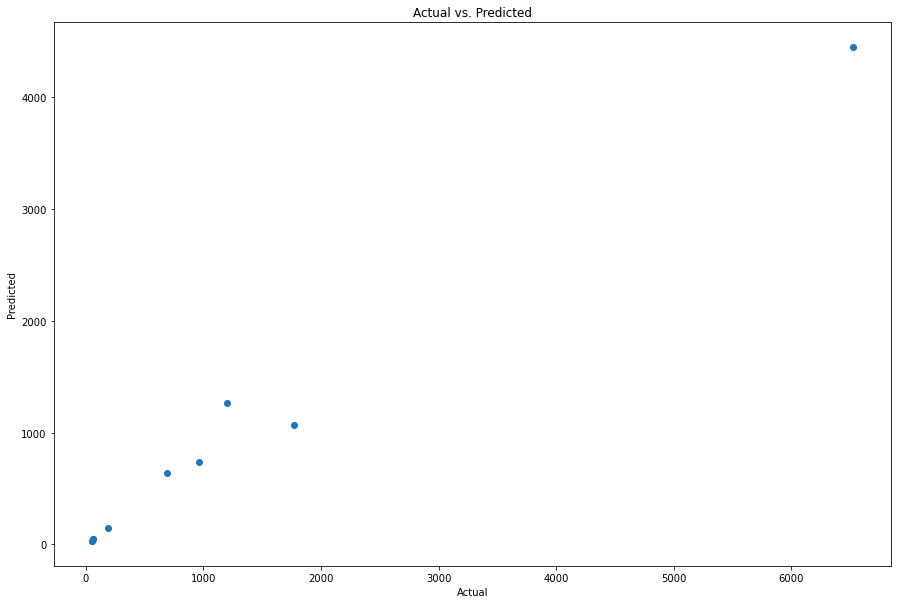

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [32]:
pred_y_df = []
for i in range(0,len(y_test)):
    pred_y_df.append(pd.DataFrame({'Actual cases':y_test[i],'Predicted cases':y_pred[i], 'Difference cases': y_test[i]-y_pred[i]}, index = ["Cases by day", "Deaths by day"]))
pred_y_df


[               Actual cases  Predicted cases  Difference cases
 Cases by day            965       737.857592        227.142408
 Deaths by day            53        32.946323         20.053677,
                Actual cases  Predicted cases  Difference cases
 Cases by day            687       639.629584         47.370416
 Deaths by day            50        29.244184         20.755816,
                Actual cases  Predicted cases  Difference cases
 Cases by day           1204      1261.449070        -57.449070
 Deaths by day            62        48.450454         13.549546,
                Actual cases  Predicted cases  Difference cases
 Cases by day           6521      4452.723477       2068.276523
 Deaths by day           184       150.668809         33.331191,
                Actual cases  Predicted cases  Difference cases
 Cases by day           1773      1068.952743        704.047257
 Deaths by day            57        46.039728         10.960272]

In [33]:
y_pred

array([[ 737.85759156,   32.94632279],
       [ 639.62958434,   29.244184  ],
       [1261.4490705 ,   48.45045402],
       [4452.72347697,  150.66880851],
       [1068.95274274,   46.03972753]])

In [34]:
y_test

array([[ 965,   53],
       [ 687,   50],
       [1204,   62],
       [6521,  184],
       [1773,   57]])